# Определение тарифа для телеком компании

«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

Тариф **«Смарт»**  
1. Ежемесячная плата: 550 рублей  
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
3. Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля  
* сообщение: 3 рубля  
* 1 Гб интернет-трафика: 200 рублей  


Тариф **«Ультра»**  
1. Ежемесячная плата: 1950 рублей  
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
3. Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль  
* сообщение: 1 рубль  
* 1 Гб интернет-трафика: 150 рублей  

**Примечание:**
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Изучение данных

In [1]:
import numpy as np 
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
calls = pd.read_csv('C:/Users/Анастасия/Documents/Jupiter_project/projects/statistical_analysis/calls.csv')
internet = pd.read_csv('C:/Users/Анастасия/Documents/Jupiter_project/projects/statistical_analysis/internet.csv')
messages = pd.read_csv('C:/Users/Анастасия/Documents/Jupiter_project/projects/statistical_analysis/messages.csv')
users = pd.read_csv('C:/Users/Анастасия/Documents/Jupiter_project/projects/statistical_analysis/users.csv')
tariffs = pd.read_csv('C:/Users/Анастасия/Documents/Jupiter_project/projects/statistical_analysis/tariffs.csv')

In [3]:
def info (data): #функция для просмотра иформации об имеющихсся данных
    data.info()
    display(data.head())
    print(data.columns)
    display(pd.DataFrame(round((data.isna().mean() * 100), 2), columns=['NaNs,%']).style.format('{:.2f}'))

### calls

In [4]:
info(calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')


,"NaNs,%"
id,0.00
call_date,0.00
duration,0.00
user_id,0.00


Таблица **calls** (информация о звонках):  
`id` — уникальный номер звонка  
`call_date` — дата звонка  
`duration` — длительность звонка в минутах  
`user_id` — идентификатор пользователя, сделавшего звонок

- [x]  названия столбцов в норме
- [x]  пропусков нет
- [ ]  типы данных не ок, позже приведем в норму столбец с датой

### internet

In [5]:
info(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')


,"NaNs,%"
Unnamed: 0,0.00
id,0.00
mb_used,0.00
session_date,0.00
user_id,0.00


Таблица **internet** (информация об интернет-сессиях):  
`id` — уникальный номер сессии  
`mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)  
`session_date` — дата интернет-сессии  
`user_id` — идентификатор пользователя

- [x]  названия столбцов в норме
- [x]  пропусков нет
- [ ]  типы данных не ок, позже приведем в норму столбец с датой
- [ ] есть лишний столбец, позже удалим

### messages

In [6]:
info(messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Index(['id', 'message_date', 'user_id'], dtype='object')


,"NaNs,%"
id,0.00
message_date,0.00
user_id,0.00


Таблица **messages** (информация о сообщениях):  
`id` — уникальный номер сообщения  
`message_date` — дата сообщения  
`user_id` — идентификатор пользователя, отправившего сообщение

- [x]  названия столбцов в норме
- [x]  пропусков нет
- [ ]  типы данных не ок, позже приведем в норму столбец с датой

### users

In [7]:
info(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')


,"NaNs,%"
user_id,0.00
age,0.00
churn_date,92.40
city,0.00
first_name,0.00
last_name,0.00
reg_date,0.00
tariff,0.00


Таблица **users** (информация о пользователях):  
`user_id` — уникальный идентификатор пользователя  
`first_name` — имя пользователя  
`last_name` — фамилия пользователя  
`age` — возраст пользователя (годы)  
`reg_date` — дата подключения тарифа (день, месяц, год)  
`churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
`city` — город проживания пользователя  
`tariff` — название тарифного плана

- [x]  названия столбцов в норме
- [x]  очень много пропусков в столбце churn_date, но это вполне объяснимо - тариф ещё действовал на момент выгрузки данных
- [ ]  типы данных не ок, позже приведем в норму столбцы с датами

### tariffs

In [8]:
info(tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')


,"NaNs,%"
messages_included,0.00
mb_per_month_included,0.00
minutes_included,0.00
rub_monthly_fee,0.00
rub_per_gb,0.00
rub_per_message,0.00
rub_per_minute,0.00
tariff_name,0.00


Таблица **tariffs** (информация о тарифах):  
`tariff_name` — название тарифа  
`rub_monthly_fee` — ежемесячная абонентская плата в рублях  
`minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату  
`messages_included` — количество сообщений в месяц, включённых в абонентскую плату  
`mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
`rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
`rub_per_message` — стоимость отправки сообщения сверх тарифного пакета  
`rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

- [x]  названия столбцов в норме
- [x]  пропусков нет
- [x]  типы данных ок

### Вывод

Выявленные проблемы:

Необходимо сменить типы данных во всех столбцах с датами, в таблице internet удалить лишний столбец.  
Необходимо устранить выявленные проблемы, а также подробнее посмотреть на значения в таблицах для устранения возможных дубликатов и аномалий в данных.

## Предобработка данных

Пройдем по каждому столбцу каждой таблицы отдельно и приведем все в порядок.

### calls

In [9]:
def datetime(data, column, position ): #функция для приведения к формату даты и созданию столбца месяц
    data[column] = pd.to_datetime(data[column], format='%Y-%m-%d')
    data.insert(position, 'month', pd.DatetimeIndex(data[column]).month)
    display(data.head())

In [10]:
datetime(calls, 'call_date', 2)

,id,call_date,month,duration,user_id
0,1000_0,2018-07-25,7,0.00,1000
1,1000_1,2018-08-17,8,0.00,1000
2,1000_2,2018-06-11,6,2.85,1000
3,1000_3,2018-09-21,9,13.80,1000
4,1000_4,2018-12-15,12,5.18,1000


Создадим функцию, которая:
* считает дубликаты строк
* выводит инфо о колонках таблицы
* показывает значения звонков-трафика-сообщений по месяцам
* меняет тип данных user_id на int

In [11]:
def check(data): 
    print('Дубликатов строк', data.duplicated().sum())
    for column in data.columns:
        print()
        print(data[column].describe(), end='\n\n\n')
    try:
        display(data.pivot_table(index='month', values='id', aggfunc='count'))
    except:
        pass
    try:
        data['user_id'] = data['user_id'].astype('int')
    except:
        pass      
    display(data.head())

In [12]:
check(calls)

Дубликатов строк 0

count     202607
unique    202607
top       1000_0
freq           1
Name: id, dtype: object



count                  202607
unique                    365
top       2018-12-31 00:00:00
freq                     1435
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: call_date, dtype: object



count    202607.000000
mean          8.574067
std           2.787093
min           1.000000
25%           7.000000
50%           9.000000
75%          11.000000
max          12.000000
Name: month, dtype: float64



count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64



count    202607.000000
mean       1253.940619
std         144.722751
min        1000.000000
25%        1126.000000
50%        1260.000000
75%        1379.000000
max        1499.000000
Name: user_id, dtype: float64




,id
month,
1,1476
2,3328
3,6687
4,9272
5,12647
6,14716
7,18298
8,21488
9,24061


,id,call_date,month,duration,user_id
0,1000_0,2018-07-25,7,0.00,1000
1,1000_1,2018-08-17,8,0.00,1000
2,1000_2,2018-06-11,6,2.85,1000
3,1000_3,2018-09-21,9,13.80,1000
4,1000_4,2018-12-15,12,5.18,1000


В столбце id дубликатов нет, формат call_date и user_id поменяли, добавили столбец с месяцем для будущих расчетов, теперь посмотрим на длительность звонков. Также видим, что количество звонков росло с каждым месяцем, вряд ли это вызвано сезонностью. Возможно, тарифы были запущены прямо с начала года. Частично подтвердить эту догадку позволит осмотр смс и трафика.

<AxesSubplot:>

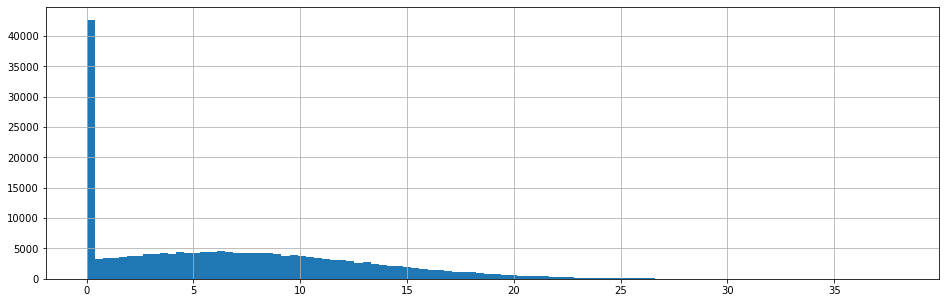

In [13]:
calls['duration'].hist(bins=100, figsize=(16, 5))

Видим, что очень много значений звонков по 0 минут, была информация, что это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять, оставляем.  По имеющимся данным также, мы знаем, что звонки округляются в большую сторону до минут, проделаем это и приведем тип данных к int.

In [14]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')
calls.head(10)

,id,call_date,month,duration,user_id
0,1000_0,2018-07-25,7,0,1000
1,1000_1,2018-08-17,8,0,1000
2,1000_2,2018-06-11,6,3,1000
3,1000_3,2018-09-21,9,14,1000
4,1000_4,2018-12-15,12,6,1000
5,1000_5,2018-11-02,11,0,1000
6,1000_6,2018-10-18,10,0,1000
7,1000_7,2018-08-22,8,19,1000
8,1000_8,2018-09-15,9,19,1000
9,1000_9,2018-08-15,8,0,1000


Данная таблица подготовлена для расчетов.

### internet

In [15]:
internet.drop('Unnamed: 0', axis=1, inplace=True) #удаляем лишний столбец

In [16]:
datetime(internet, 'session_date', 3) #добавляем месяцы

,id,mb_used,session_date,month,user_id
0,1000_0,112.95,2018-11-25,11,1000
1,1000_1,1052.81,2018-09-07,9,1000
2,1000_2,1197.26,2018-06-25,6,1000
3,1000_3,550.27,2018-08-22,8,1000
4,1000_4,302.56,2018-09-24,9,1000


In [17]:
check(internet)

Дубликатов строк 0

count     149396
unique    149396
top       1000_0
freq           1
Name: id, dtype: object



count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64



count                  149396
unique                    365
top       2018-12-31 00:00:00
freq                     1057
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: session_date, dtype: object



count    149396.000000
mean          8.563315
std           2.788717
min           1.000000
25%           7.000000
50%           9.000000
75%          11.000000
max          12.000000
Name: month, dtype: float64



count    149396.000000
mean       1252.099842
std         144.050823
min        1000.000000
25%        1130.000000
50%        1251.000000
75%        1380.000000
max        1499.000000
Name: user_id, dtype: float64




,id
month,
1,1117
2,2641
3,4885
4,6511
5,9408
6,11057
7,13548
8,16092
9,17512


,id,mb_used,session_date,month,user_id
0,1000_0,112.95,2018-11-25,11,1000
1,1000_1,1052.81,2018-09-07,9,1000
2,1000_2,1197.26,2018-06-25,6,1000
3,1000_3,550.27,2018-08-22,8,1000
4,1000_4,302.56,2018-09-24,9,1000


В столбце id дубликатов нет, формат session_date и user_id поменяли, добавили столбец с месяцем для будущих расчетов. Видим, что трафик по месяцам также рос по аналогии со звонками, плюс в опльзу теории новых тарифов. Теперь посмотрим на длительность интернет-сессий.

<AxesSubplot:>

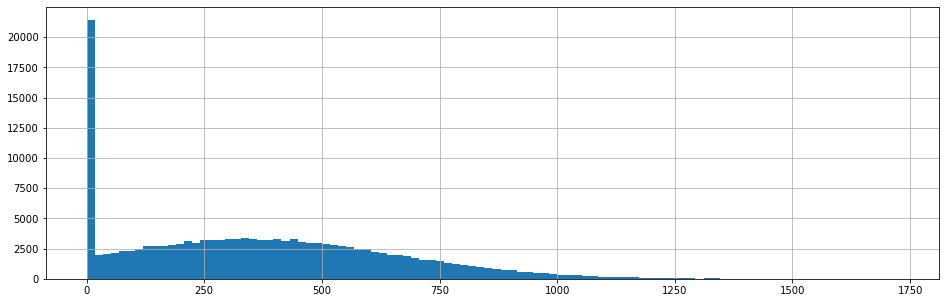

In [18]:
internet['mb_used'].hist(bins=100, figsize=(16, 5))

Очень похоже на распределение длительности звонков, а значит и на правду. Про сессии в 0мб по условию ничего не сказано, но можно предположить, что логика примерно такая же, возможно, это какие-то неудачные попытки подключения к интренету при отсуствии сигнала. Оставляем их.  
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Исходя из этого условия в текущей таблице округлять трафик мы не будем, но переведем его в Гб, а при расчетах вернемся к округлению.

In [19]:
internet.insert(1, 'gb_used', internet['mb_used'] / 1024)   #создаем новый столбец
internet.drop('mb_used', axis=1, inplace=True)  #дропаем старый
internet.head()

,id,gb_used,session_date,month,user_id
0,1000_0,0.110303,2018-11-25,11,1000
1,1000_1,1.028135,2018-09-07,9,1000
2,1000_2,1.169199,2018-06-25,6,1000
3,1000_3,0.537373,2018-08-22,8,1000
4,1000_4,0.295469,2018-09-24,9,1000


### messages

In [20]:
datetime(messages, 'message_date', 2)

,id,message_date,month,user_id
0,1000_0,2018-06-27,6,1000
1,1000_1,2018-10-08,10,1000
2,1000_2,2018-08-04,8,1000
3,1000_3,2018-06-16,6,1000
4,1000_4,2018-12-05,12,1000


In [21]:
check(messages)

Дубликатов строк 0

count     123036
unique    123036
top       1000_0
freq           1
Name: id, dtype: object



count                  123036
unique                    364
top       2018-12-31 00:00:00
freq                      859
first     2018-01-02 00:00:00
last      2018-12-31 00:00:00
Name: message_date, dtype: object



count    123036.000000
mean          8.632262
std           2.747328
min           1.000000
25%           7.000000
50%           9.000000
75%          11.000000
max          12.000000
Name: month, dtype: float64



count    123036.000000
mean       1256.989410
std         143.523967
min        1000.000000
25%        1134.000000
50%        1271.000000
75%        1381.000000
max        1499.000000
Name: user_id, dtype: float64




,id
month,
1,924
2,1924
3,3648
4,5179
5,7298
6,8983
7,11320
8,13088
9,14759


,id,message_date,month,user_id
0,1000_0,2018-06-27,6,1000
1,1000_1,2018-10-08,10,1000
2,1000_2,2018-08-04,8,1000
3,1000_3,2018-06-16,6,1000
4,1000_4,2018-12-05,12,1000


В столбце id дубликатов нет, формат message_date и user_id поменяли, добавили столбец с месяцем для будущих расчетов. Видим, что количество смс по месяцам также росло по аналогии со звонками и трафиком, плюс в пользу теории новых тарифов. Также интересный момент, что в один из дней не было отправлено ни одного смс, а точнее 1 января, тк в таблице распределения певрое значение - 02.01.2018. Либо смс действительно не отправлялись, либо данные были утеряны. В реально жизни, возможно, стоило бы проверить запрос.

### users

Поменяем типы данных в столбце churn_date и reg_date без создания доп столбца месяц.

In [22]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [23]:
check(users)

Дубликатов строк 0

count     500.000000
mean     1249.500000
std       144.481833
min      1000.000000
25%      1124.750000
50%      1249.500000
75%      1374.250000
max      1499.000000
Name: user_id, dtype: float64



count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64



count                      38
unique                     33
top       2018-12-03 00:00:00
freq                        2
first     2018-08-17 00:00:00
last      2018-12-30 00:00:00
Name: churn_date, dtype: object



count        500
unique        76
top       Москва
freq          99
Name: city, dtype: object



count       500
unique      246
top       Радим
freq          6
Name: first_name, dtype: object



count           500
unique          419
top       Андреенко
freq              5
Name: last_name, dtype: object



count                     500
unique                    270
top       201

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


В столбце id дубликатов нет, формат churn_date, reg_date и user_id поменяли. По количеству уникальных значений в именах и фамилиях все выглядит ок, по датам тоже. Проверим на всякий случай уникальные значения по городам, нет ли там записанных с ошибками итд.

In [24]:
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Все отлично, никаких разных словоформ или ошибок нет.

### tariffs

Переведем только Мб в Гб и приведем к int.

In [25]:
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'] / 1024
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'].astype('int')
tariffs.rename(columns={'mb_per_month_included': 'gb_per_month_included'}, inplace=True)
tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


### Вывод

В результате предобработки были приведены необходимые замены типов данных, параллельно добавлены столбцы со значением месяца, где необходимо. Из имеющейся статистики звонков, смс и трафика можно сделать предположение, что тарифы новые и были открыты 01.01.2018 тк наблюдался постепенный рост всех этих значений. Значимых пропусков, дубликатов или аномалий в данных не было обнаружено.

## Расчеты

Для каждого пользователя рассчитаем:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам.  
Для этого создадим сводные таблицы по каждому направлению:

In [26]:
calls_user = calls.pivot_table(index = ['user_id', 'month'], values = ['duration'], aggfunc = ['count','sum'])
calls_user.columns = ['count_call', 'min']
calls_user

count_call  min
user_id month                 
1000    5              22  159
        6              43  172
        7              47  340
        8              52  408
        9              58  466
...                   ...  ...
1498    10             41  247
1499    9               9   70
        10             68  449
        11             74  612
        12             69  492

[3174 rows x 2 columns]

In [27]:
messages_user = messages.pivot_table(index = ['user_id', 'month'], values = ['id'], aggfunc = 'count')
messages_user.columns = ['sms']
messages_user

sms
user_id month     
1000    5       22
        6       60
        7       75
        8       81
        9       57
...            ...
1498    10      42
1499    9       11
        10      48
        11      59
        12      66

[2717 rows x 1 columns]

In [28]:
internet_user = internet.pivot_table(index = ['user_id', 'month'], values = ['gb_used'], aggfunc = 'sum')
internet_user.columns = ['gb']
internet_user['gb'] = internet_user['gb'].apply(np.ceil).astype('int')
internet_user

gb
user_id month    
1000    5       3
        6      23
        7      14
        8      14
        9      15
...            ..
1498    10     21
1499    9       2
        10     18
        11     18
        12     13

[3203 rows x 1 columns]

Тк в дальнейших расчетах мы уже будем считать траты на трафик согласно тарифу, пришло время округлить в большую сторону потраченные Гб.

Далее для удобства сделаем общую таблицу и рассчитаем помесячную выручку с каждого пользователя:
* вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
* остаток умножим на значение из тарифного плана; 
* прибавим абонентскую плату, соответствующую тарифному плану.

In [29]:
users_merge = users[['user_id','city','tariff']]
users_merge

,user_id,city,tariff
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra
...,...,...,...
495,1495,Иркутск,ultra
496,1496,Вологда,smart
497,1497,Челябинск,smart
498,1498,Владикавказ,smart


In [30]:
expense = calls_user.join([messages_user, internet_user], how = 'outer')
expense = expense.reset_index(level = 'month')
expense = expense.merge(users_merge, on = ['user_id'], how = 'inner')
expense

,user_id,month,count_call,min,sms,gb,city,tariff
0,1000,5,22.0,159.0,22.0,3.0,Краснодар,ultra
1,1000,6,43.0,172.0,60.0,23.0,Краснодар,ultra
2,1000,7,47.0,340.0,75.0,14.0,Краснодар,ultra
3,1000,8,52.0,408.0,81.0,14.0,Краснодар,ultra
4,1000,9,58.0,466.0,57.0,15.0,Краснодар,ultra
...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,17.0,11.0,Санкт-Петербург,smart
3210,1489,9,NaN,NaN,32.0,17.0,Санкт-Петербург,smart
3211,1489,10,NaN,NaN,21.0,20.0,Санкт-Петербург,smart
3212,1489,11,NaN,NaN,20.0,18.0,Санкт-Петербург,smart


In [31]:
expense.user_id.unique().shape 

(498,)

После объединения таблиц у нас выпало два пользователя, скорее всего это абоненты, которые не пользовались ни одним из видов связи, проверим кто они и почему.

In [32]:
users.loc[~(users['user_id'].isin(calls['user_id']))]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
91,1091,36,NaT,Набережные Челны,Вера,Суслова,2018-05-08,ultra
106,1106,67,NaT,Калуга,Исаак,Костин,2018-04-26,ultra
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
231,1231,63,NaT,Чебоксары,Касьян,Авдюков,2018-05-23,ultra
328,1328,44,NaT,Мурманск,Рауль,Аркадьев,2018-10-16,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart
473,1473,18,NaT,Красноярск,Николай,Лебедев,2018-08-05,ultra
489,1489,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


In [33]:
users.loc[~(users['user_id'].isin(internet['user_id']))]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
273,1273,46,NaT,Курган,Рэм,Корнилов,2018-05-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


In [34]:
users.loc[~(users['user_id'].isin(messages['user_id']))]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
10,1010,26,NaT,Тюмень,Эдуард,Кононов,2018-08-05,smart
17,1017,73,NaT,Краснодар,Мария,Аленникова,2018-05-22,smart
24,1024,73,NaT,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra
...,...,...,...,...,...,...,...,...
462,1462,72,NaT,Тольятти,Алёна,Абрамычева,2018-10-29,smart
466,1466,37,NaT,Новосибирск,Рубен,Шевцов,2018-02-28,ultra
469,1469,41,NaT,Сочи,Аксён,Абалкин,2018-07-06,ultra
479,1479,40,NaT,Хабаровск,Игорь,Богданов,2018-07-03,smart


Проверяем пользователей, которые не пользовались звонками и интернетом, пользовались ли они смс - нет тк в таблице смс их тоже не было.

In [35]:
messages.query('user_id==1128 or user_id==1371')

,id,message_date,month,user_id


Итак мы видим, что 2 пользователя с user_id 1128 и 1371 действительно не пользовались ни одним из видов связей. Почему? Видим, что даты их регистрации 15.12.2018 и 25.12.2018, а это значит, что они действительно могли еще не успеть воспользовтаься услугами связи. За две недели, конечно, маловероятно, но если это была вторая симка, то возможно. В дальнейших расчетах нам эти пользователи не понадобятся, поэтому оставляем как есть и не включаем их в расчеты.

In [36]:
expense.info()
expense.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     3214 non-null   int64  
 1   month       3214 non-null   int64  
 2   count_call  3174 non-null   float64
 3   min         3174 non-null   float64
 4   sms         2717 non-null   float64
 5   gb          3203 non-null   float64
 6   city        3214 non-null   object 
 7   tariff      3214 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 226.0+ KB


user_id         0
month           0
count_call     40
min            40
sms           497
gb             11
city            0
tariff          0
dtype: int64

В процессе склейки образовались пропуски(не все пользуются всеми видами связи), заполним их нулями и приведем тип данных к int.

In [37]:
columns = ['count_call', 'min', 'sms', 'gb']
for column in columns:
    expense[column] = expense[column].fillna(0)
    expense[column] = expense[column].astype('int')
expense.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     3214 non-null   int64 
 1   month       3214 non-null   int64 
 2   count_call  3214 non-null   int32 
 3   min         3214 non-null   int32 
 4   sms         3214 non-null   int32 
 5   gb          3214 non-null   int32 
 6   city        3214 non-null   object
 7   tariff      3214 non-null   object
dtypes: int32(4), int64(2), object(2)
memory usage: 175.8+ KB


In [38]:
tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


In [39]:
expense.head()

,user_id,month,count_call,min,sms,gb,city,tariff
0,1000,5,22,159,22,3,Краснодар,ultra
1,1000,6,43,172,60,23,Краснодар,ultra
2,1000,7,47,340,75,14,Краснодар,ultra
3,1000,8,52,408,81,14,Краснодар,ultra
4,1000,9,58,466,57,15,Краснодар,ultra


Для расчета выручки с пользователя создадим функцию для строки и рассчитаем затраты:

In [40]:
def revenue(row):
    
    tariff = row['tariff']
    
    over_min = row['min'] - tariffs.loc[tariffs['tariff_name']==tariff, 'minutes_included'].item()
    over_sms = row['sms'] - tariffs.loc[tariffs['tariff_name']==tariff, 'messages_included'].item()
    over_gb = row['gb'] - tariffs.loc[tariffs['tariff_name']==tariff, 'gb_per_month_included'].item()
    
    if over_min < 0:
        rub_min = 0
    else:
        rub_min = over_min*tariffs.loc[tariffs['tariff_name']==tariff, 'rub_per_minute'].item()
   
    if over_sms < 0:
        rub_sms = 0
    else:
        rub_sms = over_sms*tariffs.loc[tariffs['tariff_name']==tariff, 'rub_per_message'].item()
        
    if over_gb < 0:
        rub_gb = 0
    else:
        rub_gb = over_gb*tariffs.loc[tariffs['tariff_name']==tariff, 'rub_per_gb'].item()
    
    revenue = rub_min+rub_sms+rub_gb+tariffs.loc[tariffs['tariff_name']==tariff, 'rub_monthly_fee'].item()
        
    return revenue

In [41]:
expense['expense'] = expense.apply(revenue, axis=1)
expense.head(10)

,user_id,month,count_call,min,sms,gb,city,tariff,expense
0,1000,5,22,159,22,3,Краснодар,ultra,1950
1,1000,6,43,172,60,23,Краснодар,ultra,1950
2,1000,7,47,340,75,14,Краснодар,ultra,1950
3,1000,8,52,408,81,14,Краснодар,ultra,1950
4,1000,9,58,466,57,15,Краснодар,ultra,1950
5,1000,10,57,350,73,15,Краснодар,ultra,1950
6,1000,11,43,338,58,15,Краснодар,ultra,1950
7,1000,12,46,333,70,10,Краснодар,ultra,1950
8,1001,11,59,430,0,18,Москва,smart,1150
9,1001,12,63,414,0,14,Москва,smart,550


**Вывод**: рассчитали помесячные траты каждого пользователя по звонкам, смс и интернету, можно приступать к исследованию.

## Анализ данных

Попробуем описать поведение клиентов оператора, исходя из выборки:

* сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц;
* каково среднее, дисперсия и стандартное отклонение;
* построим гистограммы и опишем распределения.


In [42]:
tariff_stat = expense.pivot_table(index=['tariff'], values=['min', 'gb', 'sms','expense'], 
                                  aggfunc=[np.median, np.var, np.std, np.mean]).round(1) 
tariff_stat

median                    var                             std       \
       expense  gb  min sms   expense    gb       min     sms expense   gb   
tariff                                                                       
smart     1023  17  422  28  669785.7  33.0   36219.3   796.8   818.4  5.7   
ultra     1950  19  518  38  141516.7  97.1  100873.6  2285.3   376.2  9.9   

                       mean                     
          min   sms expense    gb    min   sms  
tariff                                          
smart   190.3  28.2  1290.0  16.3  417.9  33.4  
ultra   317.6  47.8  2070.2  19.5  526.6  49.4

In [43]:
tariff_mean = tariff_stat['mean'].reset_index()
tariff_mean.rename(columns={'tariff': 'tariff_name'}, inplace=True)
tariff_mean = tariff_mean.merge(tariffs, on = ['tariff_name'])
tariff_mean

,tariff_name,expense,gb,min,sms,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,smart,1290.0,16.3,417.9,33.4,50,15,500,550,200,3,3
1,ultra,2070.2,19.5,526.6,49.4,1000,30,3000,1950,150,1,1


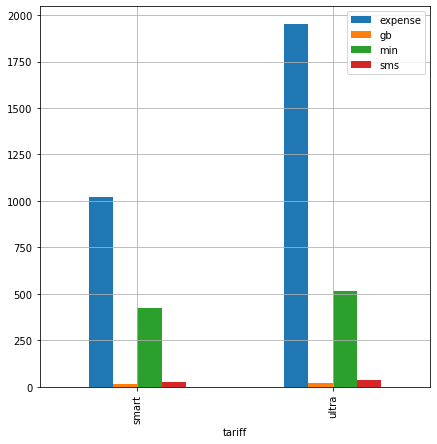

In [44]:
tariff_stat['median'].plot(grid=True,figsize=(7,7),kind='bar');

Из таблицы и графиков видно, что и медианные и средние значения по всем напрваления по тарифу Ультра выше Смарта. Детализируем:

Средние значения сообщений в месяц Ультра - 49,4/1000 Смарт - 33,4/50  
Средние значения минут разговоров в месяц Ультра - 526,6/3000 Смарт - 417,9/500  
Средние значения интернета в месяц Ультра - 19,5/30 Смарт - 16,3/15  
Средние значения выручки с пользователя Ультра - 2070,2 Смарт - 1290

Интересно также то, что относительно абонетской платы пользователи тарифа Смарт в среднем больше выходят за лимиты по тарифу, чем пользователи тарифа Ультра. Т.е., условно говоря, по тарифу Ультра пользователи чувствуют себя не ограниченными в трафиках, при этом в среднем он в таком объеме им и не нужен. В то время как пользователи тарифа Смарт в среднем выходят за лимит только по Гб, за счет чего по всей видимости и идет значительное превышение ежемесячной оплаты по тарифу. В общем, пользователи Ультры себя "пероценивают", а Смарта "недооценивают", а глобально их траты весомо отличаются только в части интернет-трафика.   

С усредненной покупательской точки зрения получается, что на Смарте находиться выгодно, тк даже переплачивая за интернет, плата все равно будет ниже Ультры, а минуты и смс не расходуются на "всю".

### Выручка

In [45]:
expense.pivot_table(index='tariff', values='expense', aggfunc='sum') #суммарная выручка с каждого тарифа

,expense
tariff,
smart,2875351
ultra,2039100


In [46]:
expense_user = expense.query('month==12') #количество абонентов по тарифам на декабрь 2018
expense_user.pivot_table(index='tariff', values='user_id', aggfunc='count')

,user_id
tariff,
smart,337
ultra,139


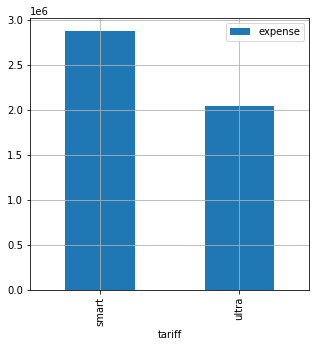

In [47]:
expense.pivot_table(index='tariff', values='expense', aggfunc='sum').plot(grid=True, figsize=(5, 5), kind='bar');

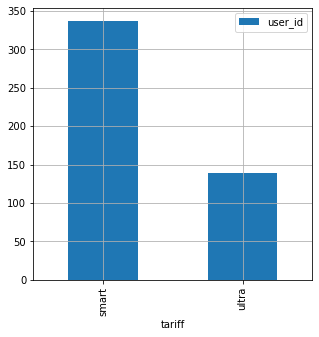

In [48]:
expense_user.pivot_table(index='tariff', values='user_id', aggfunc='count').plot(grid=True, figsize=(5, 5), kind='bar');

При этом суммарный доход от тарифа Смарт выше, чем от Ультры, потому что им пользуются более, чем в два раза больше людей(по крайней мере в нашей выборке). Можно сказать, что тариф Ультра более выгодный для компании, но Смарт берет популярностью.

In [49]:
expense_month = expense.pivot_table(index=['tariff', 'month'], 
                                    values='expense', aggfunc='sum').reset_index() #выручка с каждого тарифа по месяцам
expense_month

,tariff,month,expense
0,smart,1,24525
1,smart,2,48001
2,smart,3,89676
3,smart,4,107866
4,smart,5,168849
5,smart,6,197459
6,smart,7,246014
7,smart,8,310340
8,smart,9,324986
9,smart,10,401267


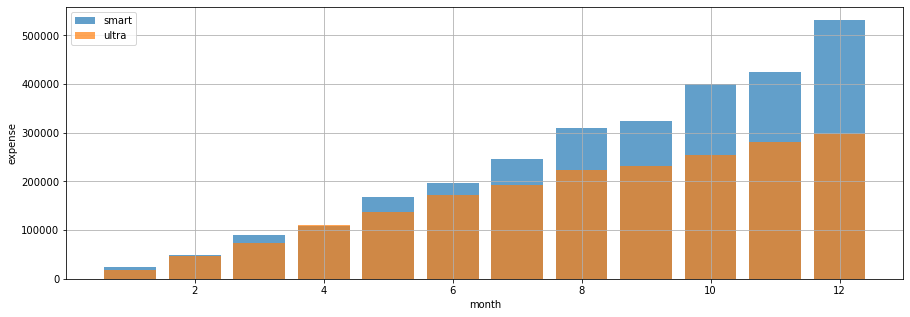

In [50]:
plt.figure(figsize=(15, 5))
plt.bar(expense_month.query('tariff=="smart"')['month'], 
        expense_month.query('tariff=="smart"')['expense'], 
        label='smart', 
        alpha=0.7);
plt.bar(expense_month.query('tariff=="ultra"')['month'], 
        expense_month.query('tariff=="ultra"')['expense'], 
        label='ultra',
        alpha=0.7);

plt.xlabel('month')
plt.ylabel('expense')
plt.grid()
plt.legend();

По данному графику видим, что выручка по обоим тарифам ежемесячно растет, и лишь в апреле вырчука Ультры немного обогнала Смарт. В остальные месяцы выручка по Смарту явно опережает Ультру и видно, что чем дальше, тем больше увеличивается разрыв. Т.е. можно спрогнозировать дальнейший рост клиентов и выручки на тарифе Смарт.

### Звонки

Далее рассмотрим распределения внутри тарифов:

In [51]:
def hist(traffic):  #функция для построения сравнения распределения параметров тарифа
    
    plt.figure(figsize=(10, 10))
    plt.grid()
    plt.hist(expense.query('tariff == "ultra"')[traffic], alpha=0.8, bins = 100, label='ultra');
    plt.hist(expense.query('tariff == "smart"')[traffic], alpha=0.8, bins = 100, label='smart');
    plt.legend()
    
    sns.catplot(x='tariff', y=traffic, kind="box", data=expense, orient='v')

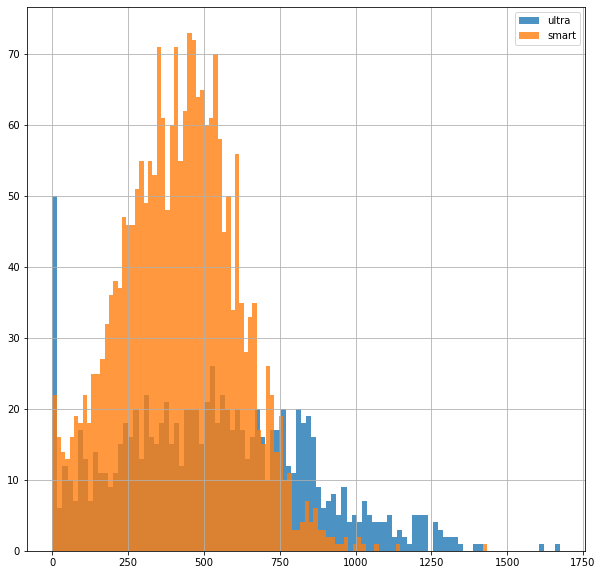

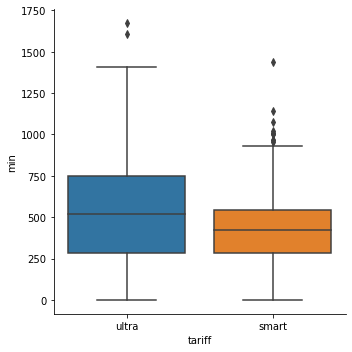

In [52]:
hist('min')

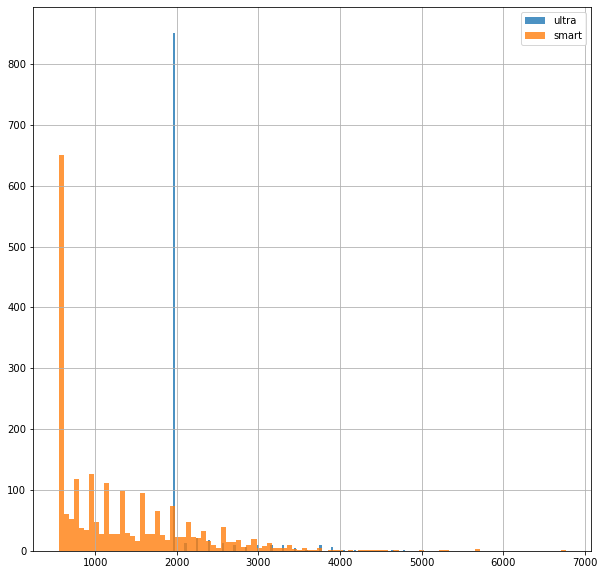

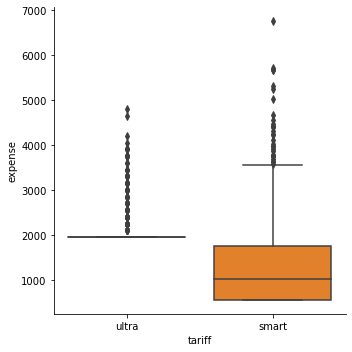

In [53]:
hist('expense')

Распределение звонков по тарифу Смарт близко к нормальному, а по тарифу Ультра близко к Пуассона. При этом на тарифе Ультра больше людей, который вообще не пользуются звонками. Выбросов по тарифу Смарт больше, чем по Ультре, но и людей на нем значительно больше. Медиана звонков по Ультре находится выше Смарта и составляет 518 минут. 

### СМС

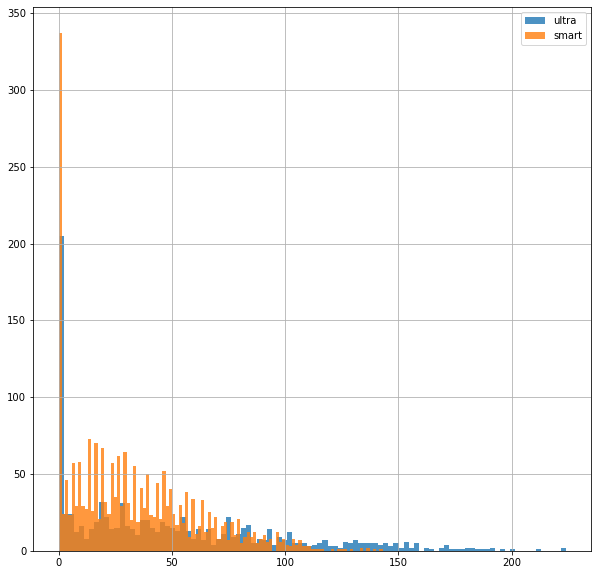

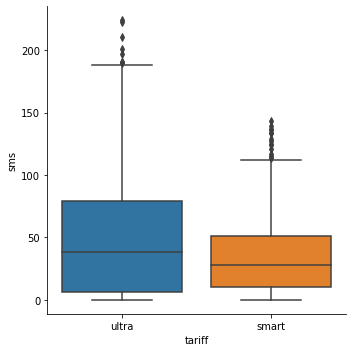

In [54]:
hist('sms')

Расперделения схожи по обоим тарифам, и с распределением Пуассона. Одинаковое количество выбросов, и медианы достаточно близки, на Ультре чуть выше. Оба тарифа сближает одинаковое неиспользование смс).

### Интернет

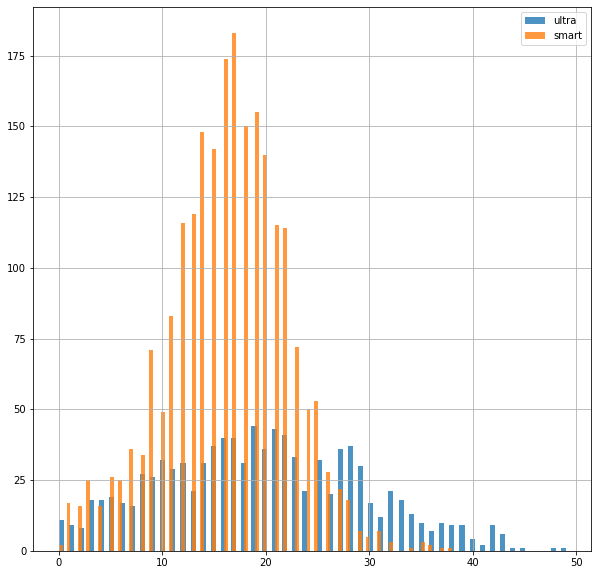

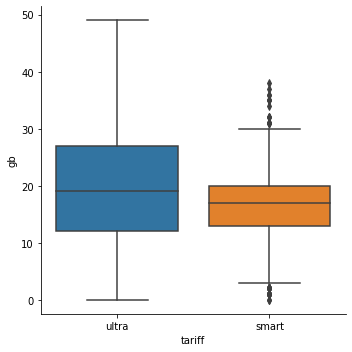

In [55]:
hist('gb')

Расперделения схожи по обоим тарифам, и с нормальным распределением. Но по тарифу Смарт значительное количество выбросов, в то время как по тарифу Ультра их нет. В целом использование интернета идет более активно на тарифе Ультра, что вполне логично, там и лимит расходования выше, при том видно, что большинство абонентов укладывается в 30Гб лимита, в то время как на Смарте как раз таки превышают свой лимит(15Гб) в среднем.

**Вывод**: в данной выборке пользователей тарифа Смарт более, чем в два раза больше, чем Ультры. Тариф Смарт "поскромнее" по лимитам, но и абонетская плата значительно ниже. Пользователи обоих тарифов практически не пользуются смс и не расходуют свои лимиты. Среднее количество потраченных минут на тарифе Ультра выше, чем на Смарте, пользователи активнее звонят. По интернет-трафику в обеих группах самая напряженная ситуация с раходованием лимитов, в тарифе Смарт заметно, что бОльшая часть выручки с тарифа идет именно с доплат за дополнительный трафик, при этом пользователи Ультры не чувствуют так остро ограничения тк лимит вполне отвечает их потребностям и поэтому редко платят сверх абонетской платы.  
При этом распределение по всем трафикам на тарифе Ультра шире, чем на Смарте, что логично, у них больше свободы и вариантов тратить свои лимиты. А так как на Смарте распределение поуже, то и выбросов больше.


## Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Т.к. H0 всегда формулируется так, чтобы использовать знак равенства, другими словами, чтобы все данные лежали в районе изначально предполагаемого значения, в нашем случае она будет звучать так **средняя выручка генеральной совокупности пользователей тарифа Ультра равна средней выручке генеральной совокупности тарифа Смарт**.  
Альтернативная гипотеза Н1 будет гласить, что они отличаются.  

Для проверки этой и последующей гипотезы используем t-тест с параметром `equal_var = False`, почему:
* нет оснований полагать, что генеральные совокупности зависимы друг от друга
* благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. Наши выборки достатончо большие
* если выборки разного размера и/или можно предположить, что дисперсии у генеральных совокупностей разные — указываем `equal_var = False`, дисперсии действиетльно разные, как мы посчитали уже выше.

Для проверки гипотезы разделим датасет по тарифам:

In [56]:
smart = expense.query('tariff=="smart"')
ultra = expense.query('tariff=="ultra"')

In [57]:
alpha = 0.01
results = st.ttest_ind(smart['expense'], ultra['expense'], equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Для данного теста выбрала критический уровень статистической значимости равный 0.01 как один из самых "строгих", чтобы показать, что даже с таким уровнем, гипотеза будет отвергнута. Полученное значение p-value говорит о том, что вероятность получить такое различие случайно значительно менее 1%, это число с 250 нулями после запятой. Это явно слишком маленькая вероятность, чтобы принять нулевую гипотезу.  Это значит, что альтернативную гипотезу о разности средних нельзя отвергнуть. При этом средние значения следующие:

In [58]:
print(f'Тариф Cмарт {smart["expense"].mean()}')
print(f'Тариф Ультра {ultra["expense"].mean()}')

Тариф Cмарт 1289.9735307312696
Тариф Ультра 2070.1522842639592


### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Т.к. H0 всегда формулируется так, чтобы использовать знак равенства, другими словами, чтобы все данные лежали в районе изначально предполагаемого значения, в нашем случае она будет звучать так **средняя выручка генеральной совокупности пользователей из Москвы равна средней выручке генеральной совокупности абонентов других регионов**.  
Альтернативная гипотеза Н1 будет гласить, что они отличаются.  
Для проверки гипотезы воспользуемся тем же t-тестом, чтобы узнать требуется ли выставлять параметр `equal_var = False` проверим дисперсию и количество абонентов в каждой из выборок.

In [59]:
moscow = expense.query('city=="Москва"')
regions = expense.query('city!="Москва"')

In [60]:
moscow['expense'].var()

565636.4670118855

In [61]:
regions['expense'].var()

654137.6285218048

In [62]:
moscow['user_id'].value_counts().count()

99

In [63]:
regions['user_id'].value_counts().count()

399

Выборки разные по размеру, и разные по дисперсии, применяем `equal_var = False`

In [64]:
alpha = 0.05
results = st.ttest_ind(moscow['expense'], regions['expense'], equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Для данного теста выбрала критический уровень статистической значимости равный 0.05, чтобы показать, что даже с таким уровнем значимости гипотезу отвергнуть не получилось. Полученное значение p-value говорит о том, что существует вероятность около 52%, что наши средние действительно не будут отличаться для Москвы и для остальных регионов.  
При этом средние значения следующие:

In [66]:
print(f'Москва {moscow["expense"].mean()}')
print(f'Регионы {regions["expense"].mean()}')

Москва 1546.7135842880523
Регионы 1524.9362274298885


К слову и среднее достаточно близкое получилось, разница всего 22 руб.

## Вывод

В ходе проекта были проанализированы данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.  

Была проведена предобработка данных, изменены типы данных в столбцах, где это требовалось. Имеющиеся пропуски были обусловлены особенностями столбца и не требовали заполнения. Также рассмотрены распределения значений по столбцам.

Также стоит отметить, что оба тарифа скорее всего были запущены в начале года и постепенно наращивали пользвоателей и выручку.
Два пользователя, которые подключились к тарифам в конце года и не успели воспользоваться услугами связи были исклчены из расчетов.

Для целей исследования были добавлены рассчетные данные:

* суммарные траты минут, сообщений и Гб интернета по месяцам по каждому пользователю;
* суммарные траты на оплату связи каждым из абонентов.


В ходе исследования были рассчитаны статистические показатели для каждого вида связи по каждому тарифу отдельно. А также построены графики распределения  по каждому из них в разрезе тарифов.

Пользователи тарифа Смарт в среднем чаще выходят за лимиты по тарифу, чем пользователи тарифа Ультра. Наиболее значимым при этом является интернет, чаще всего пользователи доплачивают именно за дополнительные Гб. Смс используются не полностью на обоих тарифах, а многими абонентами в принципе не используются. 

Наибольшее количество пользователей находится на тарифе Смарт, за счет чего суммарная выручка от него выше. При этом средняя выручка на абонента выше по тарифу Ультра. Но за пределы абонентской платы пользователи Ультры практически не выходят.
С точки зрения телеком компании выгоднее было бы максимально привлекать абонентов именно к тарифу Ультра, т.к. он прибыльнее. Но тк с точки зрения же среднего пользователя, Смарт явно выгоднее и наличие такого тарифа должно привлекать клиентов, от него не стоит октазываться, тк можно потерять львиную долю клиентов, которая суммарно дает больше Ультры.

Также были проверены 2 гипотезы:  
* Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются - с вероятностью более, чем 99%, это действительно так, причем в пользу Ультры.
* Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов - данная гипотеза не подвтердилась, с вероятностью более 50% они не отличаются.
